Index(['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'DRtg_Oliver_DIFF', 'WL_encoded'],
      dtype='object')


C:\Users\ghadf\AppData\Local\Temp\ipykernel_18352\4145649604.py:49: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessor_data.corr()


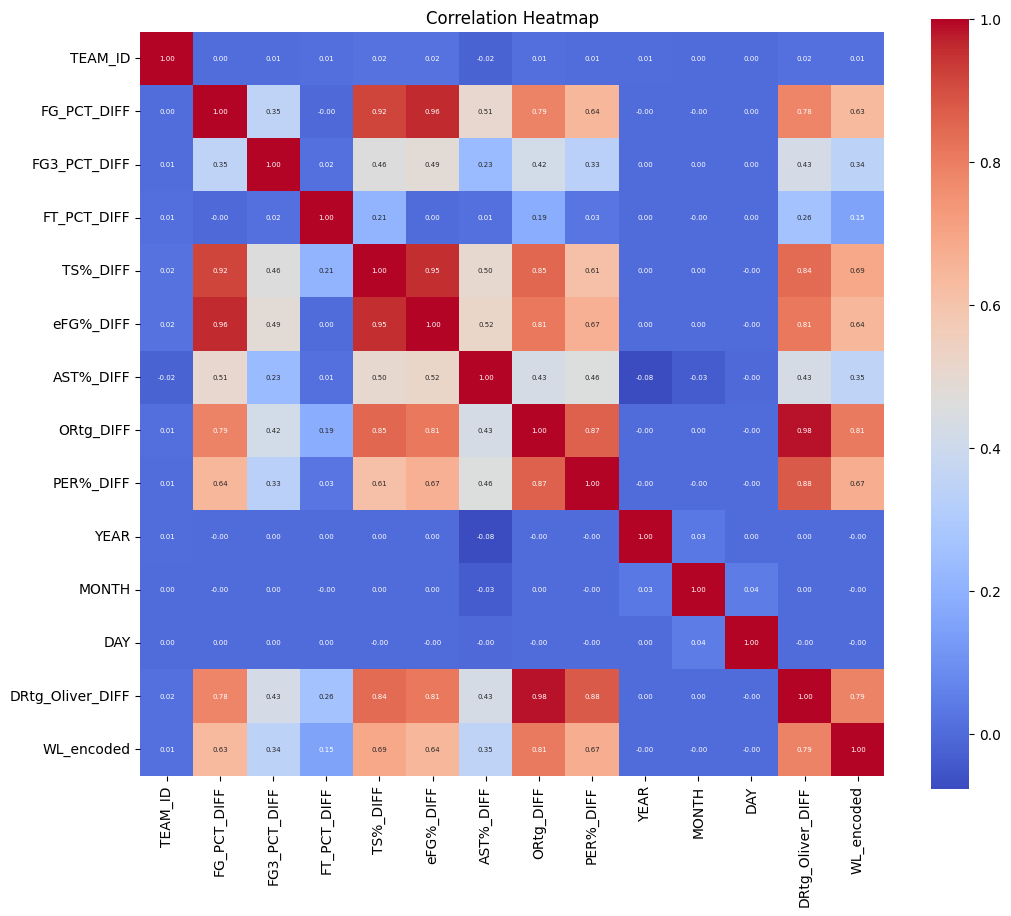

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump, load



# Load the data
data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\data\nba\model_preprocessing_store\nba_threeptera_prepreprocess_data.csv')


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
preprocessor_data = data[[col for col in data.columns if col != 'WL'] + ['WL']]

#drop the columns that are not needed
x_excluded_independent_variables = [ 'TEAM_ABBREVIATION', 'WL', 'FGA', 'TOV', 'TEAM_NAME', 'GAME_ID', 'PPM', 'RPM', 'APM', 'SPM', 'BPM', 'TPM',   
                                    'FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS%', 'ORtg', 'PER%', 'PTS_PER_MIN', 'eFG%', 'AST%', 'PTS_PER_MIN_DIFF', 'PTS_DIFF',
                                    'PER', 'OPM', 'DPM', 'USG%', 'FG3A', 'OREB', 'PF', 'MIN', 'PTS', 'FGM', 'FG3M', 'FTM', 'FTA', 'PTS', 'REB', 
                                    'AST', 'PF', 'STL', 'BLK', 'DREB', 'Offensive_Possessions', 'SEASON_ID', 'MATCHUP', 'GAME_DATE', #, 
                                    'PTS_OPP', 'FGM_OPP', 'FG3M_OPP', 'FTM_OPP', 'FTA_OPP', 'PTS_OPP', 'REB_OPP', 'OREB_OPP', 'FGA_OPP', 'FG3A_OPP', 'OREB_OPP', 
                                    'AST_OPP', 'TOV_OPP', 'STL_OPP', 'BLK_OPP', 'SEASON_ID_OPP', 'Home_Away_OPP',  'Defensive_Possessions', #
                                     'TEAM_NAME_OPP', 'WL_OPP', 'MIN_OPP', 'PF_OPP', 'DREB_OPP','PTS_PER_MIN_OPP', 'TEAM_ID_OPP',
                                     'FG_PCT_OPP', 'FG3_PCT_OPP', 'FT_PCT_OPP', 'TS%_OPP', 'eFG%_OPP', 'AST%_OPP', 'Defensive_Possessions',
                                    'DRtg', 'DPER%', 'ORtg_Oliver_OPP', 'ORtg_Oliver_DIFF', 'ORtg_Oliver', 'DRtg_Oliver', 'DRtg_Oliver_OPP', 'WL_encoded_OPP'
                                     ] #, 'PLUS_MINUS_OPP', 'PLUS_MINUS'

#drop the columns that are not needed
preprocessor_data = preprocessor_data.drop(x_excluded_independent_variables, axis=1)
print(preprocessor_data.columns)

# Create a correlation matrix for the selected columns
correlation_matrix = preprocessor_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'WL_encoded'
columns_to_drop = [y_column]


# Define feature lists
categorical_features = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID'] #, 'TEAM_ID_OPP'
numerical_features = [col for col in preprocessor_data.columns if col not in categorical_features + columns_to_drop]

# Transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

one_hot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('one_hot', one_hot_transformer, categorical_features)
])

# Apply the preprocessor to the data
X = preprocessor_data.drop(columns=columns_to_drop, axis=1)
y = preprocessor_data[y_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the data using the already fitted preprocessor
X_preprocessed = preprocessor.transform(X)

print('Before preprocessing = ', X.shape)
print('After preprocessing = ', X_preprocessed.shape)
print('y shape = ', y_encoded.shape)

# Checking if there are any null values after preprocessing
print(pd.DataFrame(X_preprocessed).isnull().sum())


Before preprocessing =  (94912, 15)
After preprocessing =  (94912, 758)
y shape =  (94912,)
0    0
dtype: int64


In [3]:
# Determine sequence length automatically based on data
def determine_sequence_length(data, max_length=None):
    # For example, let's say you decide that at least 10% of your data should be used as a sequence
    sequence_length = int(len(data) * 0.01)
    
    # If you've set a maximum length, use the minimum of the two
    if max_length:
        sequence_length = min(sequence_length, max_length)
    
    return sequence_length

seq_length = determine_sequence_length(X)
print('Sequence length:', seq_length)

Sequence length: 949


In [4]:
# Hyperparameters
BATCH_SIZE = 64
NUM_EPOCHS = 100
LEARNING_RATE = 0.001
HIDDEN_SIZE = 512
TEST_SIZE = 0.2
RANDOM_STATE = 42
seq_length = 5 #determine_sequence_length(X)
dropout_rate = 0.3


In [5]:
# Split data and create tensors
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=TEST_SIZE, shuffle=True)
# convert X_train and X_test back to dense numpy arrays
X_train = X_train.toarray()
X_test = X_test.toarray()
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.astype(np.float32))
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.astype(np.float32))

# DataLoader setup
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [6]:
#Two key factors for dropout layers
#1. Location: Try placing dropout layers after the activation functions, typically after ReLU activations.
#2. Rate: You might want to experiment with different dropout rates. 
#A common starting value is 0.5, but this might be too high depending on your specific network architecture.

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM1, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        
        # Define the first fully connected layer
        self.fc_1 = nn.Linear(hidden_size, 128)
        
        # Define the ReLU activation function
        self.relu = nn.ReLU()
        
        # Define the second fully connected layer
        self.fc = nn.Linear(128, num_classes)
        
        # Define the dropout layer
        self.dropout = nn.Dropout(0.3)  # You can experiment with the dropout rate

    def forward(self, x):
        # Reshaping the input tensor to (batch_size, seq_length, input_size)
        x = x.unsqueeze(1)
        
        # Initialize hidden state and cell state
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        output, _ = self.lstm(x, (h_0, c_0))
        
        # Get the output of the last time step
        hn = output[:, -1, :]
        
        # Pass through first fully connected layer
        out = self.fc_1(hn)
        
        # Apply dropout
        out = self.dropout(out)
        
        # Apply ReLU activation
        out = self.relu(out)
        
        # Pass through second fully connected layer to get the output
        out = self.fc(out)
        
        return out.squeeze()


In [7]:
# Model, Loss, Optimizer Setup
input_size = X_train_tensor.shape[1]
model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCEWithLogitsLoss()


Epoch 10/100, Loss: 0.0496
Epoch 20/100, Loss: 0.0114
Epoch 30/100, Loss: 0.0053
Epoch 40/100, Loss: 0.0027
Epoch 50/100, Loss: 0.0023
Epoch 60/100, Loss: 0.0007
Epoch 70/100, Loss: 0.0009
Epoch 80/100, Loss: 0.0002
Epoch 90/100, Loss: 0.0006
Epoch 100/100, Loss: 0.0012


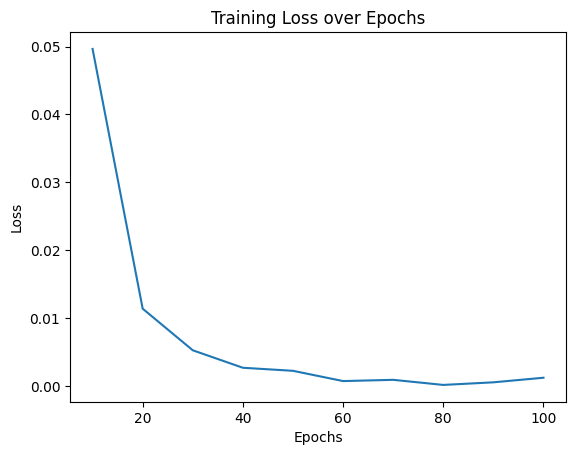

In [8]:
losses = []  # Initialize an empty list to store losses

# Training
for epoch in range(NUM_EPOCHS):
    epoch_loss = 0  # Reset epoch loss
    for features, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(features.float())  # Ensure float type
        loss = criterion(outputs, labels.float())  # Directly use labels without unsqueezing
        epoch_loss += loss.item()  # Accumulate loss
        loss.backward()
        optimizer.step()

    # Only save and print every 10 epochs
    if (epoch + 1) % 10 == 0:
        average_epoch_loss = epoch_loss / len(train_loader)
        losses.append(average_epoch_loss)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {average_epoch_loss:.4f}")

# Plotting the loss over epochs
plt.plot(range(10, NUM_EPOCHS+1, 10), losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
# Evaluation
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features.float())
        predicted = (torch.sigmoid(outputs).data > 0.5).float()
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

print('Accuracy: {:.2f}%'.format(100 * sum(np.array(all_predictions) == np.array(all_labels)) / len(all_labels)))

# Confusion Matrix & Classification Report
confusion = confusion_matrix(all_labels, all_predictions)
print("Confusion Matrix:")
print(confusion)

report = classification_report(all_labels, all_predictions)
print("\nClassification Report:")
print(report) #95.68% is the top so far

Accuracy: 95.41%
Confusion Matrix:
[[9122  429]
 [ 442 8990]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      9551
         1.0       0.95      0.95      0.95      9432

    accuracy                           0.95     18983
   macro avg       0.95      0.95      0.95     18983
weighted avg       0.95      0.95      0.95     18983



In [10]:
#Save Model and preprocessor

# Save Model and Preprocessor Paths
pipeline_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\preprocessing\lstm_nn_preprocessor.joblib'
model_save_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\nba_models\lstm_nn_model.pth'


# Save the preprocessor
dump(preprocessor, pipeline_save_path)

# Save the LSTM model
torch.save(model.state_dict(), model_save_path)


In [11]:
# Load the Preprocessor and Model
loaded_pipeline = load(pipeline_save_path)

model = LSTM1(1, input_size, HIDDEN_SIZE, 1).float()
model.load_state_dict(torch.load(model_save_path))
model.eval()  # Set the model to evaluation mode

LSTM1(
  (lstm): LSTM(758, 512, batch_first=True)
  (fc_1): Linear(in_features=512, out_features=128, bias=True)
  (relu): ReLU()
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [12]:
#read "unseen" data so we can test what these models would predict for the 2022 playoffs
#prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\nba_test_unseen_dataset.csv')
prediction_data = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\23_24_season_games_clean.csv')

#print(prediction_data.head())

# Drop the columns that are not needed Matchup
prediction_data = prediction_data.drop(columns=['PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF','FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%' ])
    #
included_columns = ['TEAM_ID', 'Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF',
       'FT_PCT_DIFF', 'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF',
       'PER%_DIFF', 'YEAR', 'MONTH', 'DAY', 'WL_encoded', 'DRtg_Oliver_DIFF']



feature_order = [#'PTS_PER_MIN', 'PTS_DIFF', 'PTS_PER_MIN_DIFF', 'TEAM_ID_OPP', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',  'FG_PCT_OPP', 'FG3_PCT_OPP',  'SEASON_ID', 'GAME_ID'
                   #'TS%', 'ORtg', 'PER%', 'eFG%', 'AST%', 'FT_PCT_OPP', 'PLUS_MINUS_OPP','TS%_OPP', 'eFG%_OPP', 'AST%_OPP', , 'MATCHUP'
                  'Home_Away', 'YEAR', 'MONTH', 'DAY', 'MATCHUP_ID','TEAM_ID', #'DRtg', 'DPER%',
                 'FG_PCT_DIFF','FG3_PCT_DIFF','FT_PCT_DIFF','TS%_DIFF','eFG%_DIFF','AST%_DIFF','ORtg_DIFF','PER%_DIFF', 'DRtg_Oliver_DIFF'] #, 'MATCHUP'

prediction_data = prediction_data[included_columns]
#prediction_data = prediction_data.drop(x_excluded_independent_variables, axis=1)

#does feature_names = feature_order?
print(len(included_columns))
print(len(feature_order))

# Reorder columns in the new_data DataFrame
prediction_data = prediction_data[feature_order]
print(prediction_data.head())
print(prediction_data.shape)

16
15
  Home_Away  YEAR  MONTH  DAY MATCHUP_ID     TEAM_ID  FG_PCT_DIFF  \
0      Away  2023     12    1     DENPHX  1610612743     0.005090   
1      Away  2023     12    1     NOPSAS  1610612759     0.105012   
2      Home  2023     12    1     NYKTOR  1610612761     0.039482   
3      Home  2023     12    1     DALMEM  1610612742     0.068942   
4      Home  2023     12    1     BOSPHI  1610612738    -0.038935   

   FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  \
0      0.073046    -0.024369  0.026485   0.028028   2.384284  -0.431831   
1      0.077711     0.162609  0.121912   0.109726   7.134411  20.518408   
2      0.039072    -0.107692  0.035131   0.070257   4.841478  -2.056961   
3      0.063455     0.092105  0.098689   0.074565   2.155288  16.412073   
4     -0.083710     0.042308 -0.056855  -0.064336  -6.635993  -8.939238   

   PER%_DIFF  DRtg_Oliver_DIFF  
0  -4.589667         -0.962301  
1  20.962013         21.347664  
2   1.172877         -1.14869

In [13]:
# Ensure prediction_data has the right columns
assert set(feature_order).issubset(prediction_data.columns), "Some features are missing in the unseen data."


In [14]:
# Preprocess the unseen data
X_new_preprocessed = loaded_pipeline.transform(prediction_data)
print('After preprocessing:', X_new_preprocessed.shape)


After preprocessing: (12, 758)


In [15]:
# Make predictions using the loaded model
X_new_preprocessed = X_new_preprocessed.toarray()
X_new_tensor = torch.tensor(X_new_preprocessed.astype(np.float32))

# Use the trained model to make predictions
logits = model(X_new_tensor)
probabilities = torch.sigmoid(logits)
predicted_labels = (probabilities > 0.5).float()

# Add predictions to a new DataFrame (since the number of rows will differ due to sequence creation)
prediction_results = pd.DataFrame(predicted_labels.detach().numpy(), columns=['PREDICTION'])

# Reset the index of prediction_data to make sure it aligns with prediction_results
prediction_data.reset_index(drop=True, inplace=True)

# Concatenate the prediction results to the original DataFrame
prediction_data_with_results = pd.concat([prediction_data, prediction_results], axis=1)

print(prediction_data_with_results.head())
print(prediction_data_with_results.shape)


  Home_Away  YEAR  MONTH  DAY MATCHUP_ID     TEAM_ID  FG_PCT_DIFF  \
0      Away  2023     12    1     DENPHX  1610612743     0.005090   
1      Away  2023     12    1     NOPSAS  1610612759     0.105012   
2      Home  2023     12    1     NYKTOR  1610612761     0.039482   
3      Home  2023     12    1     DALMEM  1610612742     0.068942   
4      Home  2023     12    1     BOSPHI  1610612738    -0.038935   

   FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  eFG%_DIFF  AST%_DIFF  ORtg_DIFF  \
0      0.073046    -0.024369  0.026485   0.028028   2.384284  -0.431831   
1      0.077711     0.162609  0.121912   0.109726   7.134411  20.518408   
2      0.039072    -0.107692  0.035131   0.070257   4.841478  -2.056961   
3      0.063455     0.092105  0.098689   0.074565   2.155288  16.412073   
4     -0.083710     0.042308 -0.056855  -0.064336  -6.635993  -8.939238   

   PER%_DIFF  DRtg_Oliver_DIFF  PREDICTION  
0  -4.589667         -0.962301         0.0  
1  20.962013         21.347664         1.0  

In [16]:

# Convert YEAR, MONTH, DAY into a date column
prediction_data_with_results['Date'] = pd.to_datetime(prediction_data_with_results[['YEAR', 'MONTH', 'DAY']])
prediction_data_with_results = prediction_data_with_results.sort_values(by=['Date'])

# Merge with unique teams data
df1 = pd.read_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\team_ids.csv')
unique_teams = df1[['TEAM_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION']].drop_duplicates()
prediction_data_with_results = prediction_data_with_results.merge(unique_teams, on='TEAM_ID', how='left')

# Drop unnecessary columns
columns_to_drop = ["TEAM_ID", "YEAR", "MONTH", "DAY"]
prediction_data_with_results = prediction_data_with_results.drop(columns=columns_to_drop)

# filter for todays games
today = pd.Timestamp.today().normalize()
prediction_data_with_results = prediction_data_with_results[prediction_data_with_results['Date'] == today]

# Display summarized results
season_pred = prediction_data_with_results  # Assuming you want all columns. Adjust accordingly.
print(season_pred.head())

# Save the predictions
#season_pred.to_csv(r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_seq_season_pred.csv', index=False)
print(season_pred.shape)

  Home_Away MATCHUP_ID  FG_PCT_DIFF  FG3_PCT_DIFF  FT_PCT_DIFF  TS%_DIFF  \
0      Away     DENPHX     0.005090      0.073046    -0.024369  0.026485   
1      Away     NOPSAS     0.105012      0.077711     0.162609  0.121912   
2      Home     NYKTOR     0.039482      0.039072    -0.107692  0.035131   
3      Home     DALMEM     0.068942      0.063455     0.092105  0.098689   
4      Home     BOSPHI    -0.038935     -0.083710     0.042308 -0.056855   

   eFG%_DIFF  AST%_DIFF  ORtg_DIFF  PER%_DIFF  DRtg_Oliver_DIFF  PREDICTION  \
0   0.028028   2.384284  -0.431831  -4.589667         -0.962301         0.0   
1   0.109726   7.134411  20.518408  20.962013         21.347664         1.0   
2   0.070257   4.841478  -2.056961   1.172877         -1.148698         0.0   
3   0.074565   2.155288  16.412073  14.405144         15.265460         1.0   
4  -0.064336  -6.635993  -8.939238 -10.631933         -8.190421         0.0   

        Date          TEAM_NAME TEAM_ABBREVIATION  
0 2023-12-01    

In [17]:
from datetime import datetime
import pandas as pd
import os

# 1. Create a DataFrame for today's outcomes based on prediction_data
today_predictions = prediction_data_with_results.copy()

#rename PREDICTION to lstm_prediction
today_predictions.rename(columns={'PREDICTION': 'ltsm_PREDICTION'}, inplace=True)
print(today_predictions.columns)

# 2. Add today's date and recording timestamp
today_predictions['date_prediction_recorded'] = pd.Timestamp.today()

#filter for ATLCHA matchup_id
#today_predictions = today_predictions[today_predictions['MATCHUP_ID'] == 'ATLCHA']

# Define the path to the saved predictions
saved_predictions_path = r'C:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\ML\nba_w_l_prediction_models\nba_analysis\data\ltsm_season_pred.csv'

# 3. Check if the saved predictions file exists
if not os.path.exists(saved_predictions_path):
    # If it doesn't exist, create it from today's predictions
    today_predictions.to_csv(saved_predictions_path, index=False)
    print(today_predictions.shape)
else:
    # If it exists, load it and update
    saved_predictions = pd.read_csv(saved_predictions_path)
    # Normalize the 'Date' column to remove time portion
    saved_predictions['Date'] = pd.to_datetime(saved_predictions['Date']).dt.normalize()

    print(saved_predictions.shape)

    print(today_predictions.shape)
    # 4. Concatenate existing and new predictions
    all_predictions = pd.concat([saved_predictions, today_predictions], ignore_index=True)
    
    # 5. Sort by date recorded, matchup id, and home_away
    all_predictions.sort_values(by=['date_prediction_recorded', 'MATCHUP_ID', 'Home_Away'], ascending=[True, True, True], inplace=True)
    
    # 6. Remove duplicates, keeping only the newest entry and not deleting previous days predictions
    all_predictions.drop_duplicates(subset=['MATCHUP_ID', 'TEAM_NAME', 'Date'], keep='first', inplace=True)
    
    # Sort by date and reset index
    all_predictions = all_predictions.sort_values(by=['Date']).reset_index(drop=True)
    #only include these columns ['Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF','TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF','DRtg_Oliver_DIFF', 'ltsm_PREDICTION', 'Date', 'TEAM_NAME','TEAM_ABBREVIATION']
    all_predictions = all_predictions[['Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF','TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF','DRtg_Oliver_DIFF', 'ltsm_PREDICTION', 'Date', 'TEAM_NAME','TEAM_ABBREVIATION']]
    # 7. Save the updated DataFrame back to CSV
    all_predictions.to_csv(saved_predictions_path, index=False)

# 8. Display the results
#print(all_predictions.head())
#print(all_predictions.shape)
print(all_predictions.columns)

Index(['Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'DRtg_Oliver_DIFF', 'ltsm_PREDICTION', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')
(512, 15)
(12, 16)
Index(['Home_Away', 'MATCHUP_ID', 'FG_PCT_DIFF', 'FG3_PCT_DIFF', 'FT_PCT_DIFF',
       'TS%_DIFF', 'eFG%_DIFF', 'AST%_DIFF', 'ORtg_DIFF', 'PER%_DIFF',
       'DRtg_Oliver_DIFF', 'ltsm_PREDICTION', 'Date', 'TEAM_NAME',
       'TEAM_ABBREVIATION'],
      dtype='object')


In [18]:
#print just predictions and matchup_id
#print(all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'PREDICTION']])

#filter all_predictions for just today
today = pd.Timestamp.today().normalize()
all_predictions = all_predictions[all_predictions['Date'] == today]

# sum prediction column by matchup_id
all_predictions['prediction_sum'] = all_predictions.groupby('MATCHUP_ID')['ltsm_PREDICTION'].transform('sum')
#filter non 1's in count
#all_predictions = all_predictions[all_predictions['prediction_sum'] != 1]
print(all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'ltsm_PREDICTION', 'prediction_sum']])


    MATCHUP_ID             TEAM_NAME  ltsm_PREDICTION  prediction_sum
512     NYKTOR       Toronto Raptors              0.0             1.0
513     BOSPHI        Boston Celtics              0.0             1.0
514     DALMEM     Memphis Grizzlies              0.0             1.0
515     DENPHX          Phoenix Suns              0.0             0.0
516     DENPHX        Denver Nuggets              0.0             0.0
517     ORLWAS    Washington Wizards              0.0             1.0
518     NOPSAS     San Antonio Spurs              1.0             1.0
519     NOPSAS  New Orleans Pelicans              0.0             1.0
520     NYKTOR       New York Knicks              1.0             1.0
521     ORLWAS         Orlando Magic              1.0             1.0
522     DALMEM      Dallas Mavericks              1.0             1.0
523     BOSPHI    Philadelphia 76ers              1.0             1.0


In [19]:
all_predictions = all_predictions[['MATCHUP_ID', 'TEAM_NAME', 'ltsm_PREDICTION', 'prediction_sum']]
all_pred_grouped = all_predictions[all_predictions['prediction_sum'] != 1]
print(all_pred_grouped)

    MATCHUP_ID       TEAM_NAME  ltsm_PREDICTION  prediction_sum
515     DENPHX    Phoenix Suns              0.0             0.0
516     DENPHX  Denver Nuggets              0.0             0.0


In [20]:
all_pred_grouped = all_predictions[all_predictions['prediction_sum'] == 1]
print(all_pred_grouped) 

    MATCHUP_ID             TEAM_NAME  ltsm_PREDICTION  prediction_sum
512     NYKTOR       Toronto Raptors              0.0             1.0
513     BOSPHI        Boston Celtics              0.0             1.0
514     DALMEM     Memphis Grizzlies              0.0             1.0
517     ORLWAS    Washington Wizards              0.0             1.0
518     NOPSAS     San Antonio Spurs              1.0             1.0
519     NOPSAS  New Orleans Pelicans              0.0             1.0
520     NYKTOR       New York Knicks              1.0             1.0
521     ORLWAS         Orlando Magic              1.0             1.0
522     DALMEM      Dallas Mavericks              1.0             1.0
523     BOSPHI    Philadelphia 76ers              1.0             1.0
